## Module 7 - Network Practice

In this notebook, we will see how to create network visualizations using the `igraph` library. 


Here are some references:

- [igraph manual pages](http://igraph.org/r/doc/)

- [igraph reference](https://cran.r-project.org/web/packages/igraph/igraph.pdf)

- [network data sources](http://www-personal.umich.edu/~mejn/netdata/)


## `igraph` Library


There are several different ways of defining graphs. Let's start with a simple network. Here, we will create the network **from scratch by giving the list of edges**. 


Edges are represented by **vertex pairs**. Two vertices (nodes) are connected by an edge (link).  In the following example, we give a list of vertices where each pair defines an edge. 

In [1]:
library(igraph)

# we can create a graph by giving a list of vertex pairs. 
edges <- c(1,2, 3,2, 2,4)
edges


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



[1] 1 2 3 2 2 4

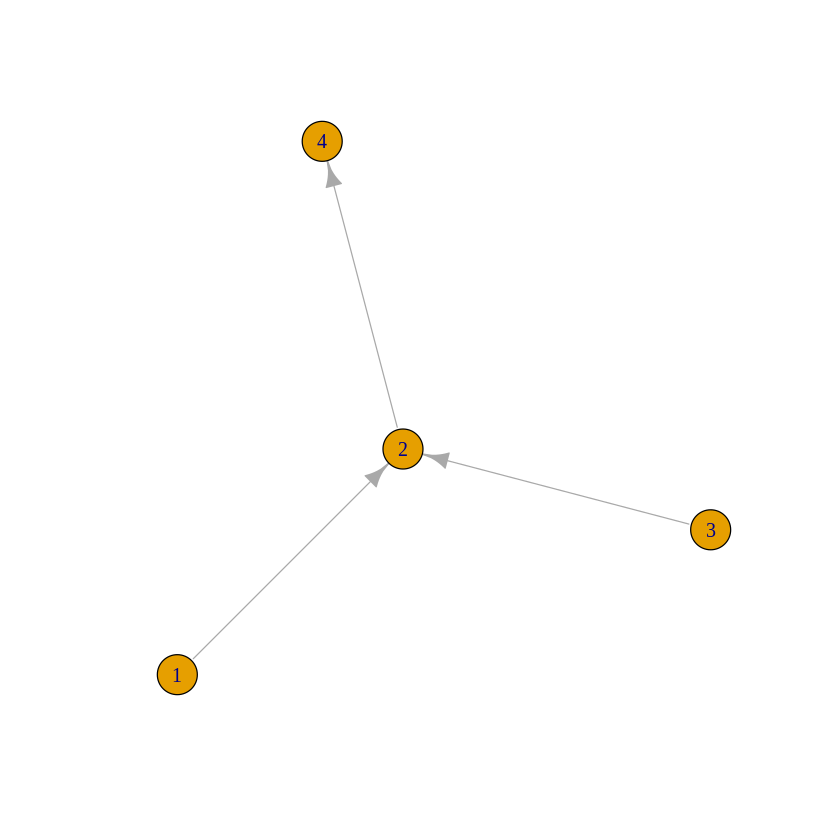

In [2]:
# now CONVERT this list to a directed graph
g<-graph(edges, n=max(edges), directed=TRUE)

# there are 3 pairs, so there will be three edges 
plot(g)

Note that `g` is a graph object, **not** a data frame. Note the represenation of the edges below: 

In [3]:
g

IGRAPH cda0a2f D--- 4 3 -- 
+ edges from cda0a2f:
[1] 1->2 3->2 2->4

---

### Graph Statistics

We can find out some properties and compute some basic **statistics** about a graph like in the following examples: 

In [4]:
# vertex count of the graph g
vcount(g)

[1] 4

In [5]:
# edge count of the graph g
ecount(g)

[1] 3

In [6]:
# vertices of the graph g
V(g)

+ 4/4 vertices, from cda0a2f:
[1] 1 2 3 4

In [7]:
# edges of the graph g
E(g)

+ 3/3 edges from cda0a2f:
[1] 1->2 3->2 2->4

In [8]:
# neighbors of the second vertex (v2)
neighbors(g, V(g)[2], mode = 1)

+ 1/4 vertex, from cda0a2f:
[1] 4

In [9]:
# statistics about neighbors
incident(g,V(g)[2], mode=c("all", "out", "in", "total"))

+ 3/3 edges from cda0a2f:
[1] 2->4 1->2 3->2

In [10]:
# are vertices 1 and 3 connected ? 
are.connected(g, V(g)[1], V(g)[3])

[1] FALSE

In [11]:
# get a list of graph edges 
get.edgelist(g)

1,2
3,2
2,4


### YOUR TURN: 

**Create the first graph** from the lab notebook with six edges using the `igraph` functions. Remember that it is an **undirected** graph. In a **directed** graph, the order of vertex pairs matters. 

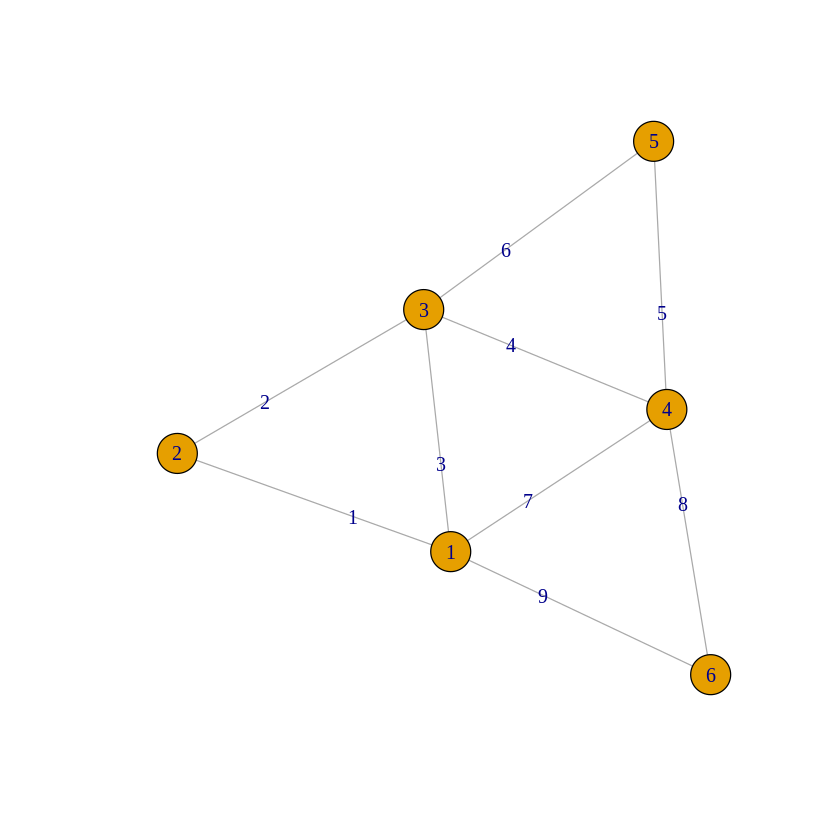

In [23]:

# first define a list of vertex pairs 
edges1 <- c(1,2, 2,3, 1,3, 3,4, 4,5, 5,3, 1,4, 4,6, 1,6)

# then convert it to a graph and plot it 
g1 <- graph(edges1, n=max(edges), directed=FALSE)

plot(g1, edge.label=E(g1))


**Can you also create the second graph with the directed edges?** (the order of the vertex pairs matters.)

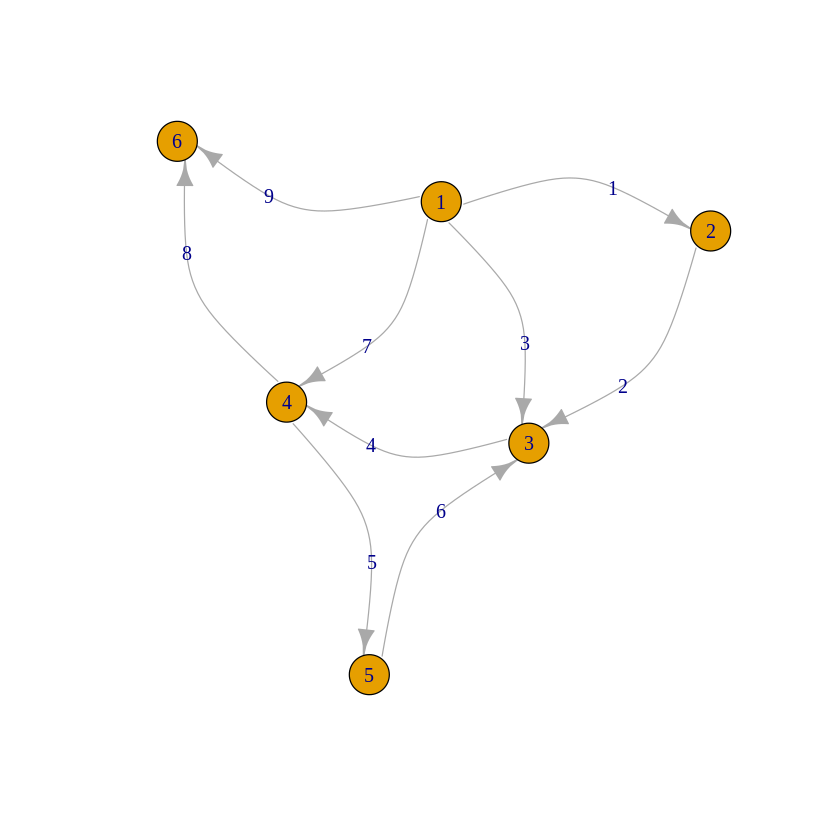

In [28]:
edges2 <- c(1,2, 2,3, 1,3, 3,4, 4,5, 5,3, 1,4, 4,6, 1,6)

g2 <- graph(edges2, n=max(edges), directed=TRUE)

plot(g2, edge.curved=TRUE, edge.label=E(g2))

---

### Clustering 

Clustering, also called community detection, is a useful method to find closely connected groups of vertices in a graph that can lead to discoveries in the underlying data. The following code creates a sample graph, and uses `cluster_fast_greedy()` function to find clusters of nodes. There are many functions for clustering that use different algorithms; see the igraph manual for different methods of clustering. 

(Every time you run the following cell, it will produce a different graph, try it.)

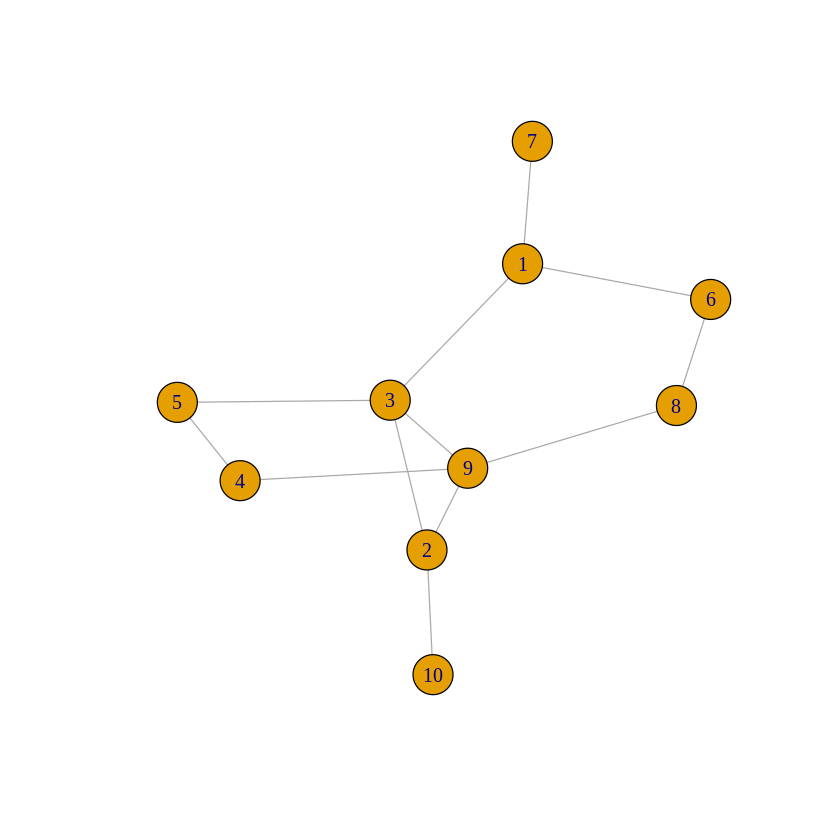

In [29]:
g3 <- sample_gnp(10, 3/10)
plot(g3)
clust <- cluster_fast_greedy(g3)


`clust` is a data structure that contains data about the result of clustering, such as memberships of vertices to the detected clusters. We can visualize this data in several ways like following: 

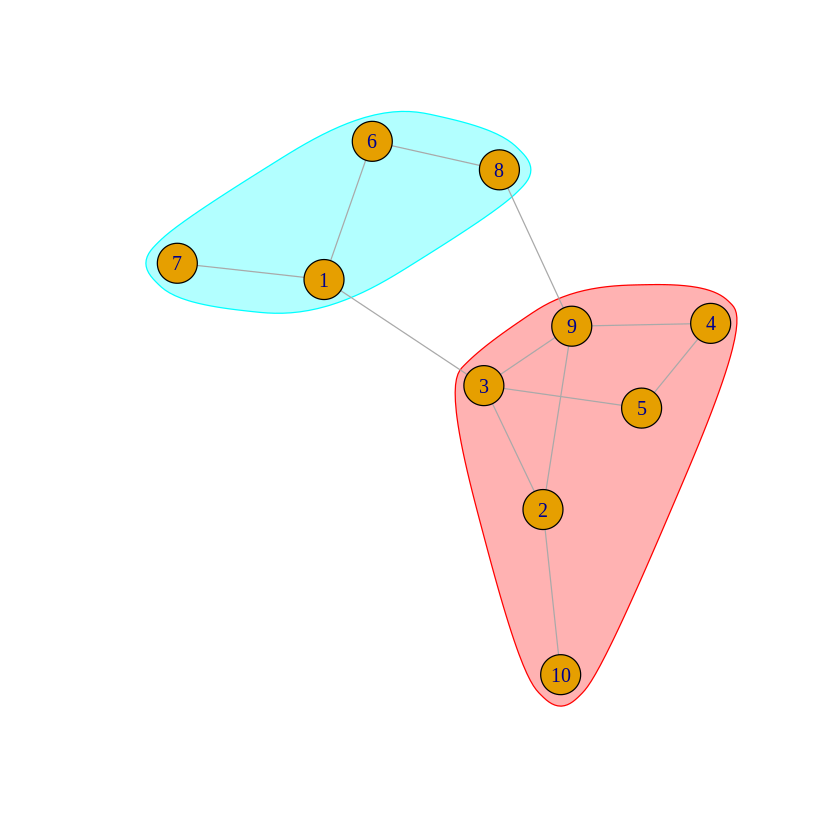

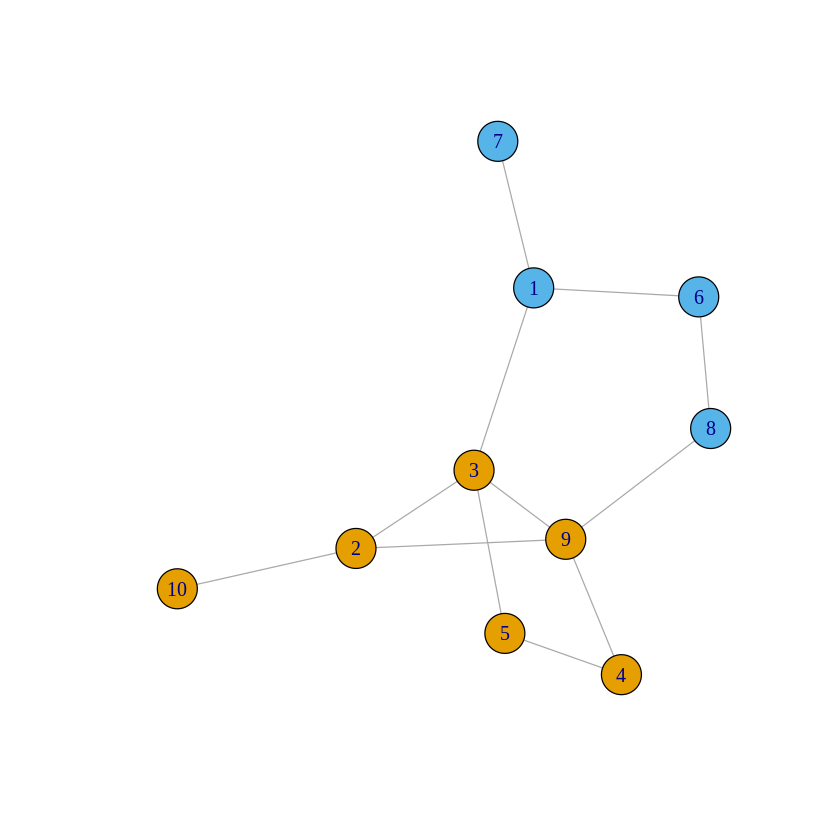

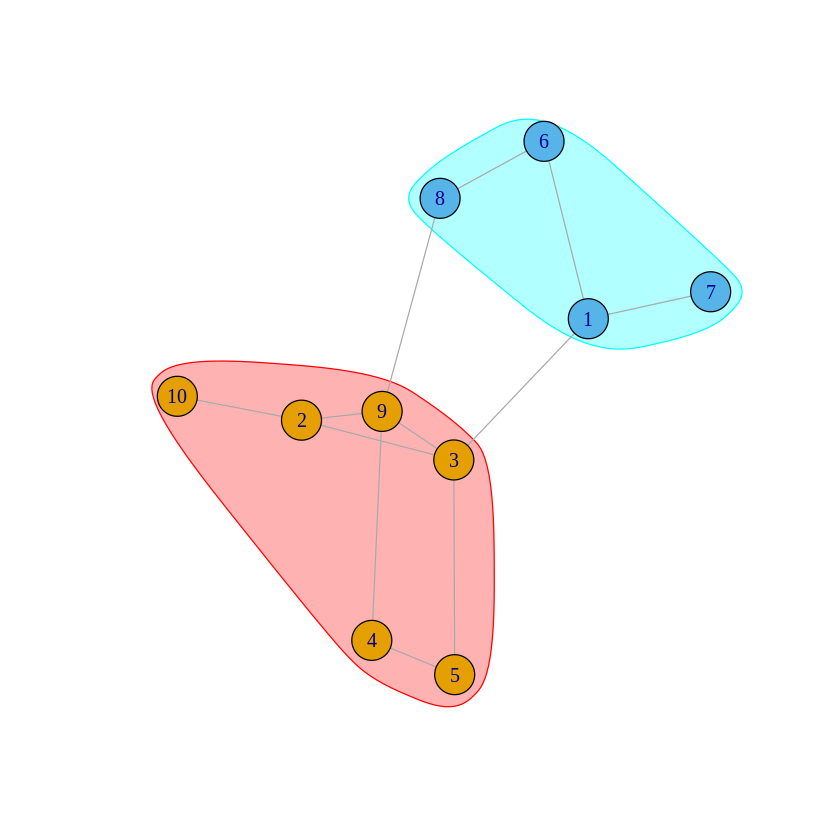

In [36]:
# use communities list to mark the groups of nodes 
plot(g3, mark.groups=communities(clust))

# color each node with respect to their membership to a cluster 
plot(g3, vertex.color=membership(clust))

# do both 
plot(g3, mark.groups=communities(clust), vertex.color=membership(clust))

**This grouping may not make sense but when we change the layout from random to some optimal layout taking into account the connectedness of the nodes, we see that clusters actually make sense.**

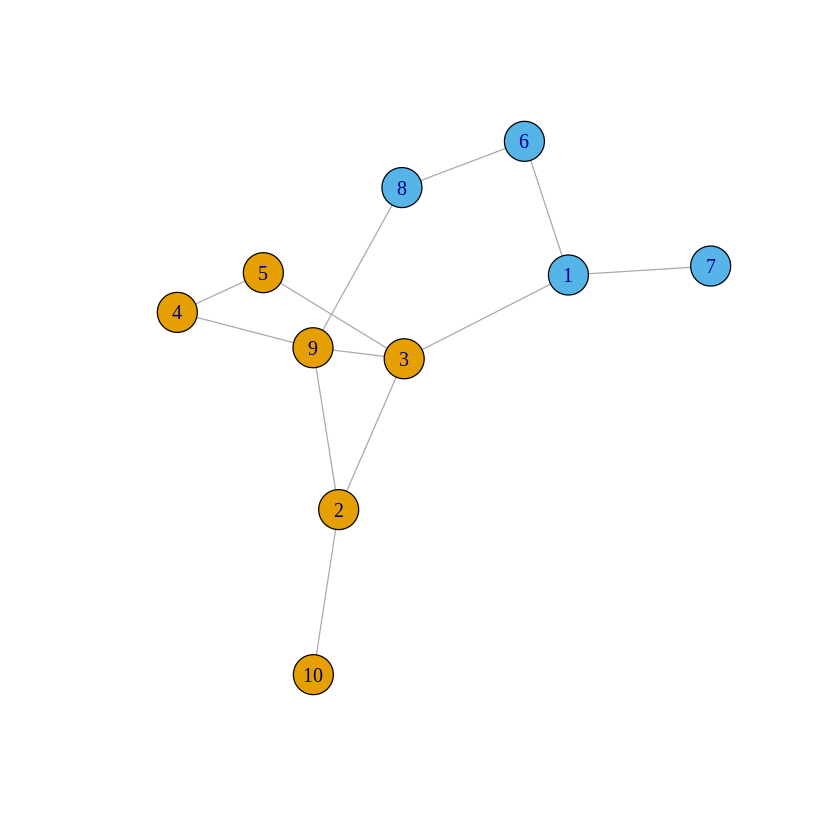

In [37]:
coords = layout_with_fr(g3)
plot(g3, layout=coords, vertex.color=membership(clust))

We will see how to change the layout later. 


### YOUR TURN:

**Compute and visualize clusters** for the following graph of friendships between 34 members of a club. 


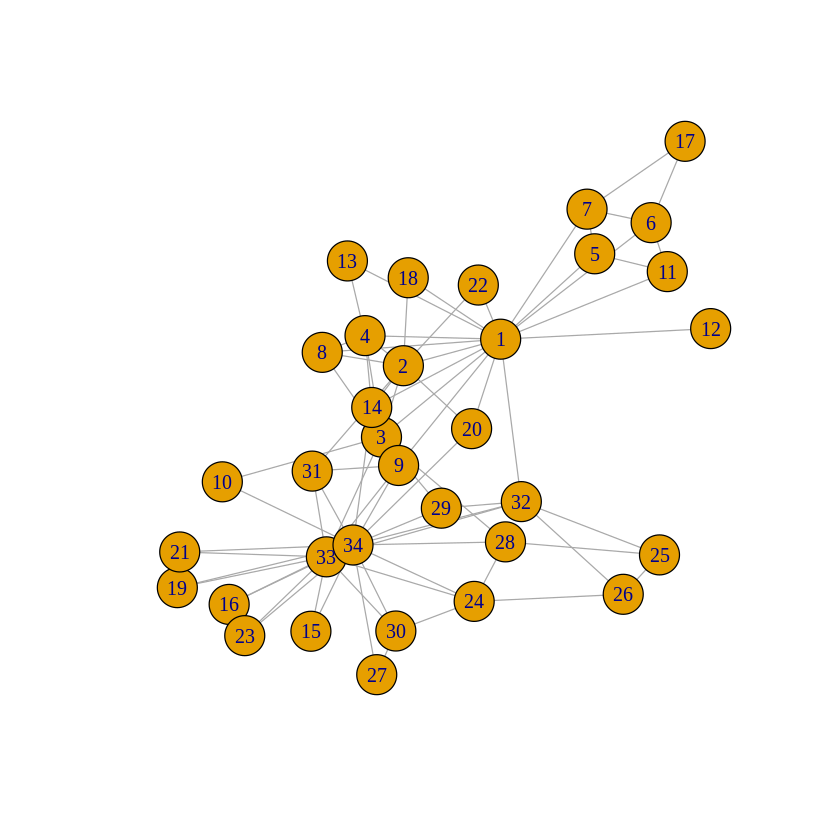

In [38]:
gz = make_graph("Zachary")
plot(gz)

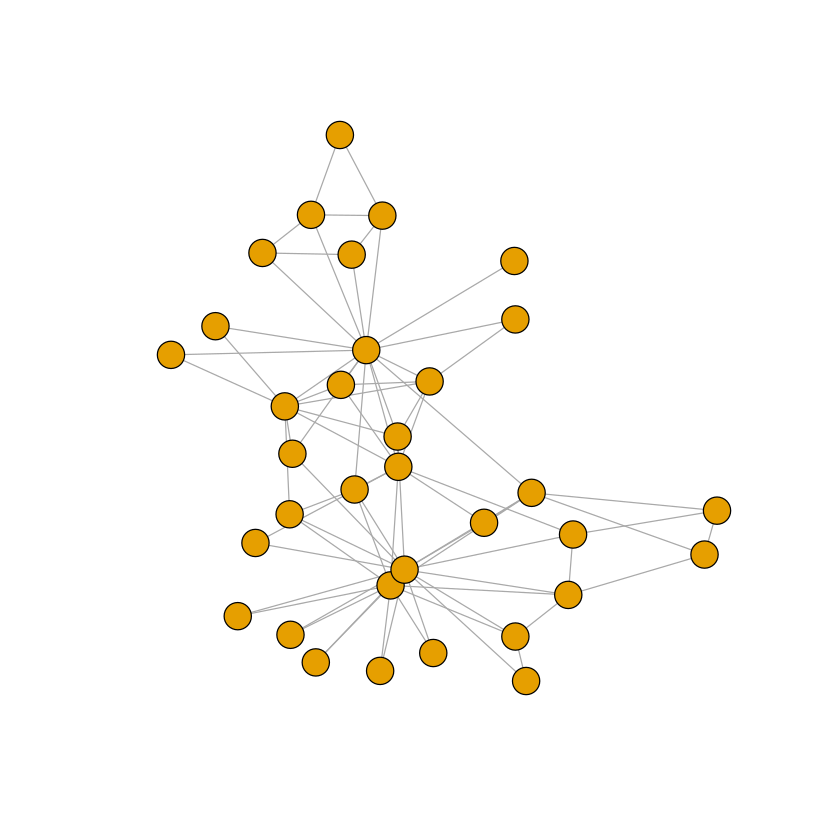

In [39]:
coordsz = layout_with_fr(gz)
# plot the graph
plot(gz, layout=coordsz, vertex.label=NA, vertex.size=10)

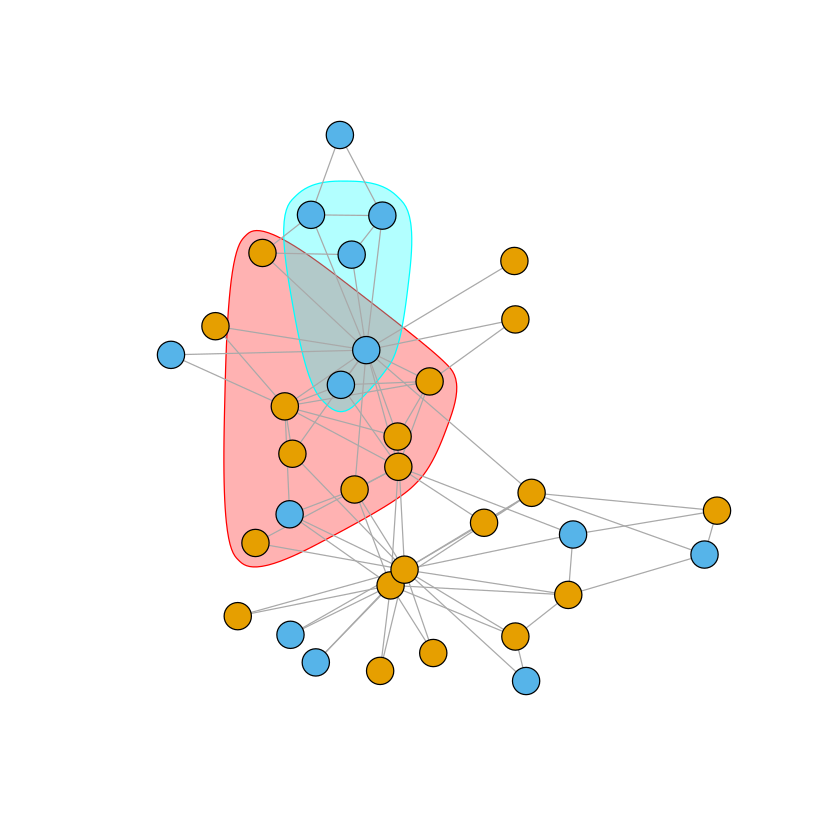

In [42]:
plot(gz, layout=coordsz, vertex.label=NA, vertex.size=10, mark.groups=communities(clust), vertex.color=membership(clust))


--- 

## Reading Graphs from a File

We can also read an **edge list from a plain text file into a data frame** and convert it to a graph. 

In this example, the vertices (nodes) are labeled by letters, and each row represents an edge between two vertices. 

In [43]:
# This is the file content:
# A,B
# A,G
# A,Y
# G,Y

t <-read.csv("/dsa/data/all_datasets/networks/graph1.txt", header=FALSE)

# t is a data frame
head(t)

V1,V2
<fct>,<fct>
A,B
A,G
A,Y
G,Y


The following **converts the data frame to an igraph object**. Look up the parameters of the `graph.data.frame`. 

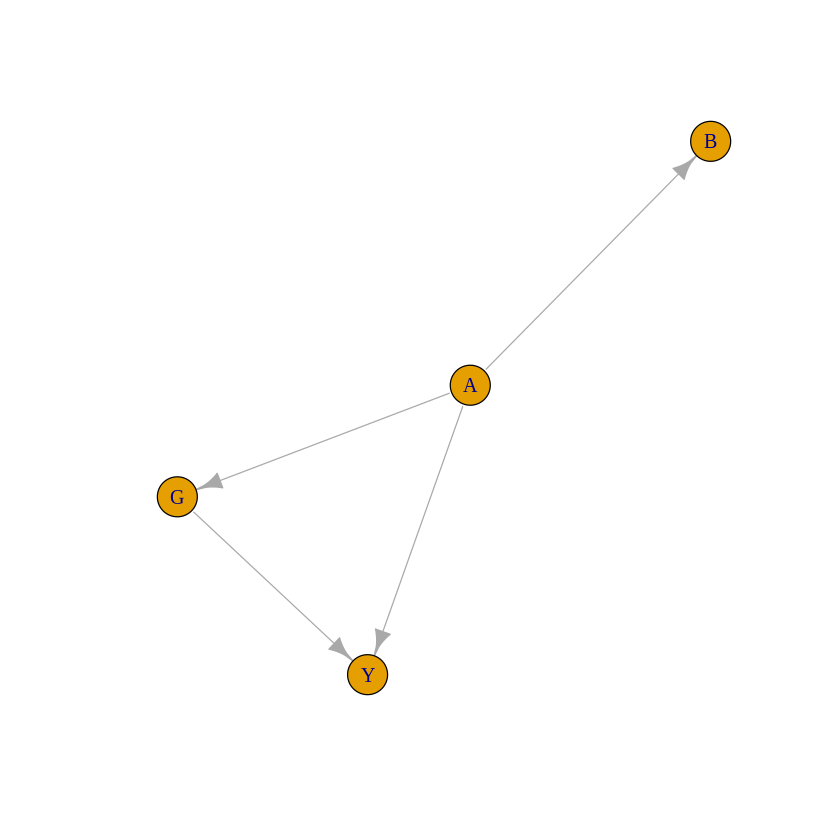

In [44]:
# gt is an  igraph object 
gt <- graph.data.frame(t)
plot(gt)

### YOUR TURN: 

**Compute the same statistics** for `gt` as before done for `g`. 

In [45]:
ecount(gt)

[1] 4

In [46]:
vcount(gt)

[1] 4


---


We can also read an **adjacency matrix** from a text file as opposed to a list of vertex pairs. 


**Remember what an adjacency matrix is from the lab notebook**. 

This is a sample row from the file showing the **connectivity of the first vertex** to the other vertices:

```
 0 1 1 1 0 0 0 0 1 0 0 1 0
```

In [47]:
adj_matrix <- as.matrix(read.table("/dsa/data/all_datasets/networks/SAcountries.txt",header=FALSE, sep=" "))
adj_matrix

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13
0,1,1,1,0,0,0,0,1,0,0,1,0
1,0,1,1,0,0,0,0,1,1,0,0,0
1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,0,0,0,0,0,0,0,1,0,0,0
0,0,1,0,0,1,0,0,0,1,0,0,1
0,0,0,0,1,0,0,0,0,1,0,0,0
0,0,1,0,0,0,0,0,0,0,1,0,0
0,0,1,0,0,0,0,0,0,0,1,0,1
1,1,1,0,0,0,0,0,0,0,0,0,0
0,1,1,1,1,1,0,0,0,0,0,0,0


We also need **names/labels** for vertices (nodes). The above matrix data actually represents **neighborhood relationships between the countries in South America**. 

Let's read the country names from a different file:

In [48]:
SAnames <- read.csv("/dsa/data/all_datasets/networks/SAcountrylist.txt", header=FALSE)
SAnames

V1
<fct>
Argentina
Bolivia
Brazil
Chile
Colombia
Ecuador
FrenchGuiana
Guyana
Paraguay


Let's build an **undirected** simple (nonweighted) graph from the above matrix. **Study the following code:**

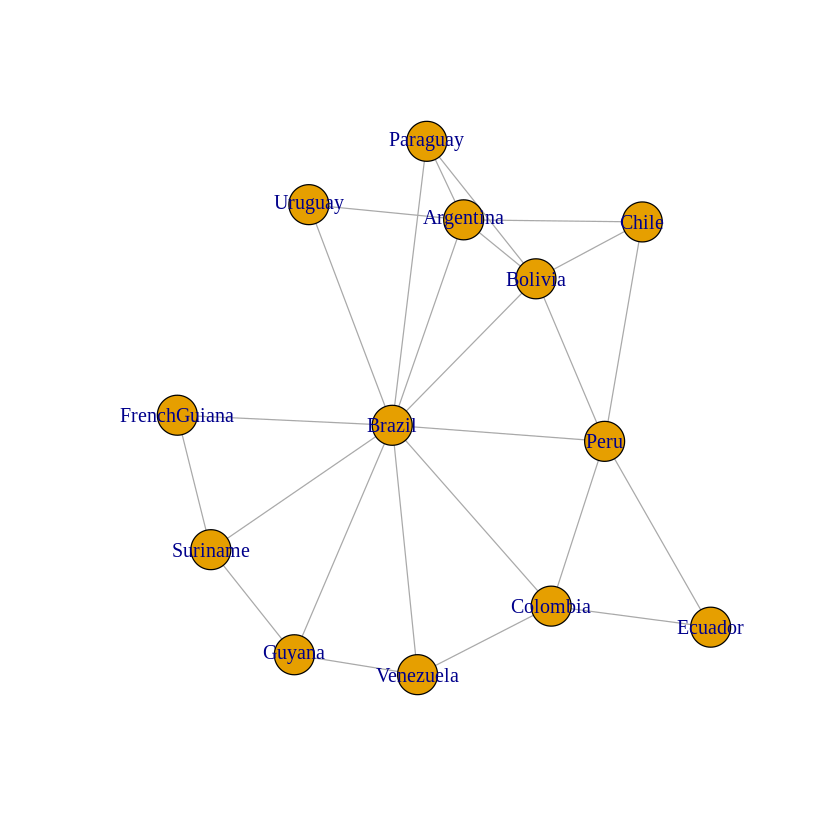

In [49]:
gSA <-  graph_from_adjacency_matrix(adj_matrix, weighted = NULL,  mode = "undirected")

# remove loops
gSA <- simplify(gSA)

# set labels and degrees of vertices
gSA <- set_vertex_attr(gSA, "label", value= as.vector(SAnames$V1))
plot(gSA)

In [51]:
gSA

IGRAPH 9b4fa64 UN-- 13 25 -- 
+ attr: name (v/c), label (v/c)
+ edges from 9b4fa64 (vertex names):
 [1] V1--V2  V1--V3  V1--V4  V1--V9  V1--V12 V2--V3  V2--V4  V2--V9  V2--V10
[10] V3--V5  V3--V7  V3--V8  V3--V9  V3--V10 V3--V11 V3--V12 V3--V13 V4--V10
[19] V5--V6  V5--V10 V5--V13 V6--V10 V7--V11 V8--V11 V8--V13

**You can create new attributes for each vertex in the graph like this:** 

In [52]:
# create an attribute to hold degree for each vertex
V(gSA)$degree <- degree(gSA)

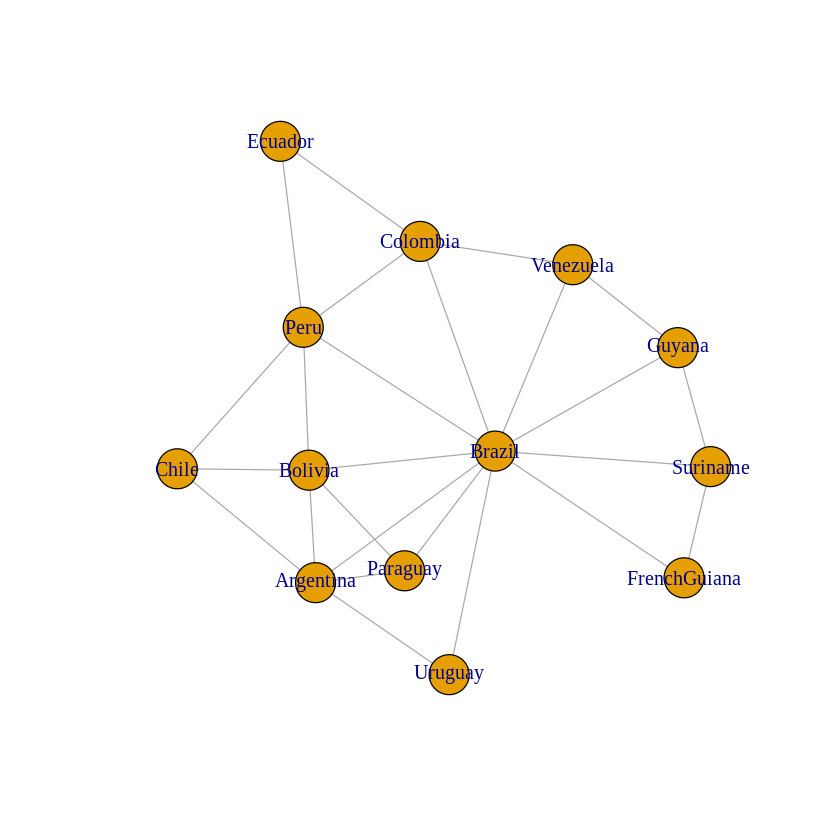

In [53]:
# do a force-directed layout 
layout1 <- layout.fruchterman.reingold(gSA)

# draw the newtwork 
plot(gSA, layout=layout1)

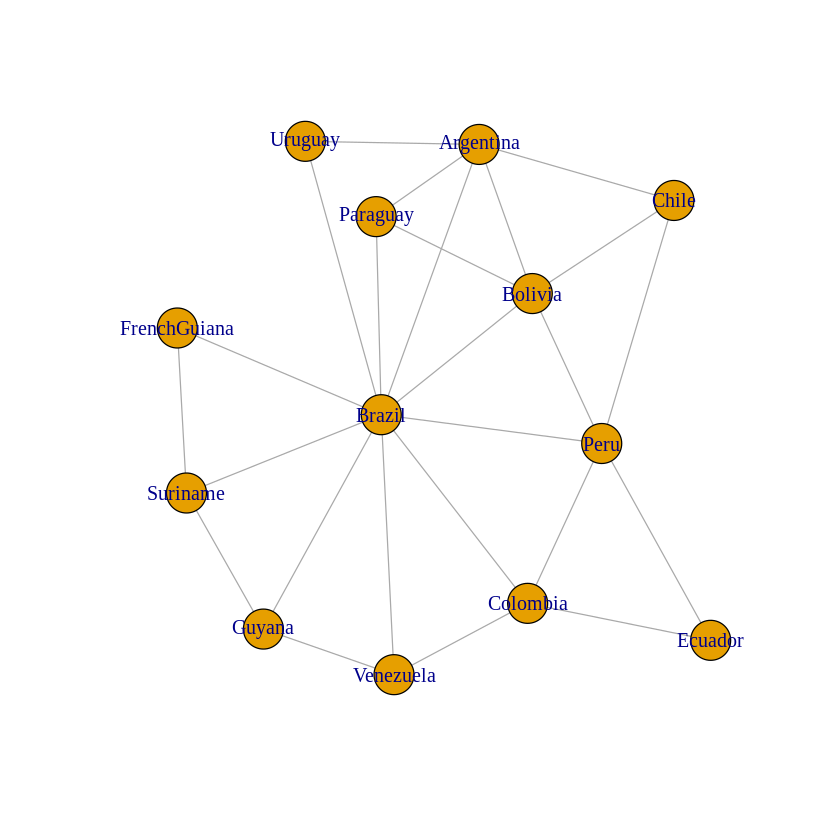

In [56]:
# another layout 
plot(gSA, layout=layout.kamada.kawai)


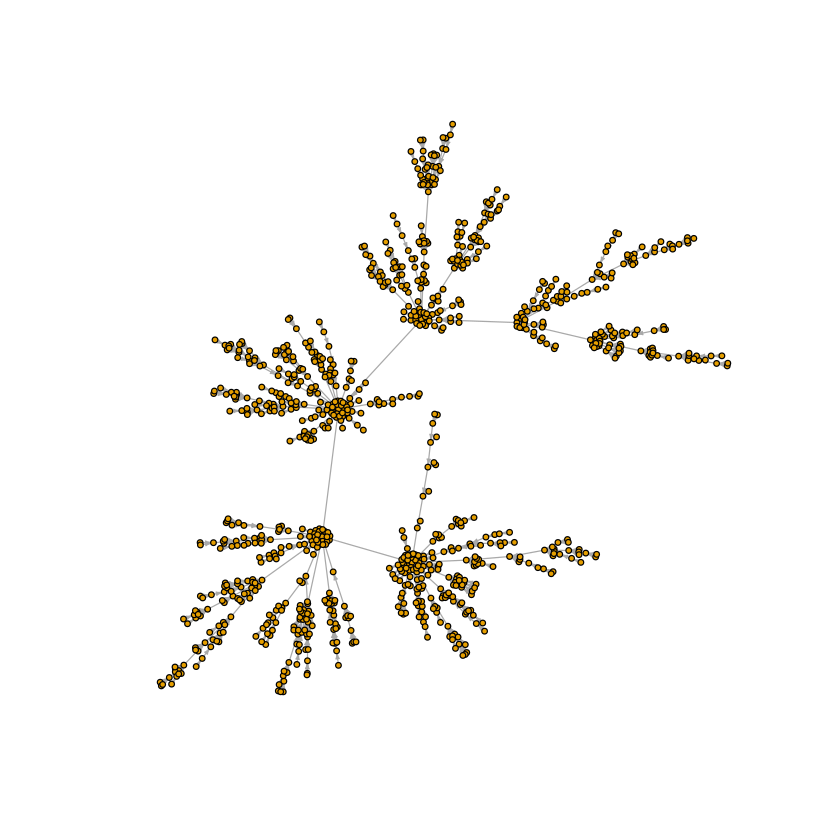

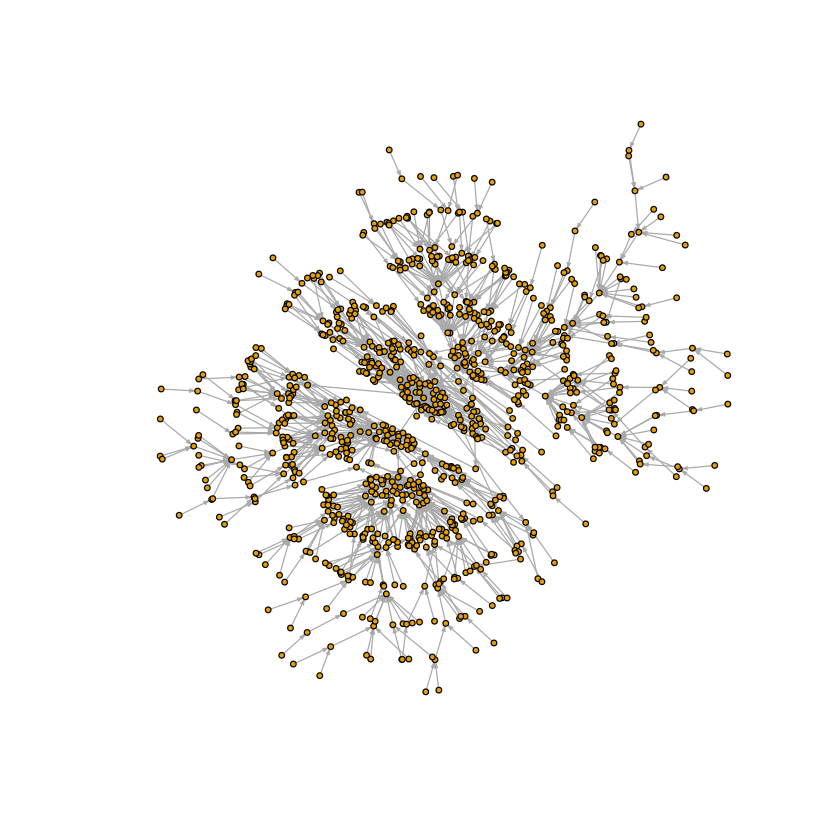

In [57]:
# this is an example of a more complicated graph, it'll take a while to draw:
gb <- barabasi.game(1000, power=1)
l1 <- layout.fruchterman.reingold(gb)
l2 <- layout.kamada.kawai
plot(gb, layout=l1, vertex.size=2, vertex.label=NA, edge.arrow.size=.2)
plot(gb, layout=l2, vertex.size=2, vertex.label=NA, edge.arrow.size=.2)

### YOUR TURN: 

**Find the clusters in the South America network and visualize them.**


In [58]:
gSA

IGRAPH 9b4fa64 UN-- 13 25 -- 
+ attr: name (v/c), label (v/c), degree (v/n)
+ edges from 9b4fa64 (vertex names):
 [1] V1--V2  V1--V3  V1--V4  V1--V9  V1--V12 V2--V3  V2--V4  V2--V9  V2--V10
[10] V3--V5  V3--V7  V3--V8  V3--V9  V3--V10 V3--V11 V3--V12 V3--V13 V4--V10
[19] V5--V6  V5--V10 V5--V13 V6--V10 V7--V11 V8--V11 V8--V13

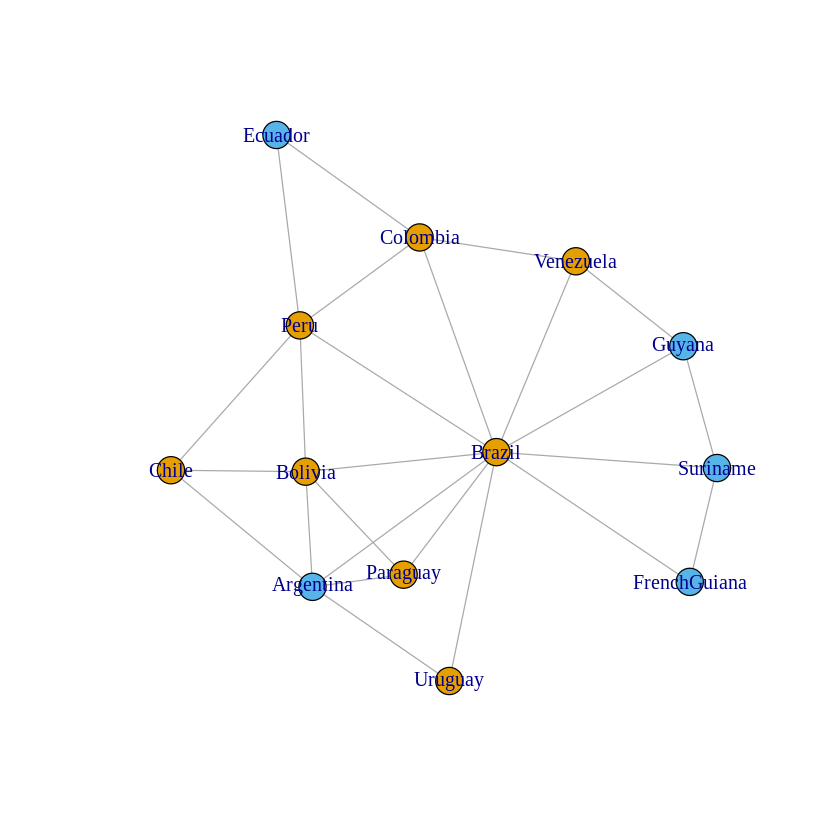

In [62]:
plot(gSA, 
     layout=layout1, 
     vertex.size=10, 
     vertex.color=membership(clust))